# Regresión lineal para predicción de progresión de diabetes
- age: Representa la edad del paciente, normalizada (no es la edad real, sino una representación estandarizada).
- sex: Sexo del paciente, representado como una variable numérica normalizada (valores entre -0.5 y 0.5).
- bmi: Índice de Masa Corporal (Body Mass Index, BMI), una medida del peso relativo al cuadrado de la altura.
- bp:
Promedio de presión arterial (Blood Pressure, BP), normalizada.
- s1: Nivel sérico de lípidos totales (colesterol total).
- s2: Nivel sérico de lipoproteínas de baja densidad (LDL, “colesterol malo”).
- s3: Nivel sérico de lipoproteínas de alta densidad (HDL, “colesterol bueno”).
- s4: Relación entre el colesterol total y HDL.
- s5: Nivel sérico de triglicéridos, representado como una medida numérica normalizada.
- s6: Nivel sérico de glucosa en ayuno, una medida clave en el monitoreo de la diabetes.

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos
diabetes_data = load_diabetes()

# Convertir el conjunto de datos a un DataFrame para facilitar su manipulación
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target  # Agregar la variable objetivo al DataFrame

# Mostrar las primeras filas del DataFrame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [2]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['target'])
y = df['target']


In [3]:
from sklearn.model_selection import train_test_split

# 80% para entrenamiento, 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


Tamaño de entrenamiento: (353, 10)
Tamaño de prueba: (89, 10)


In [4]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

print("✅ Modelo entrenado correctamente.")


✅ Modelo entrenado correctamente.


In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Resultados del modelo:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


📊 Resultados del modelo:
Error cuadrático medio (MSE): 2900.19
Coeficiente de determinación (R²): 0.45


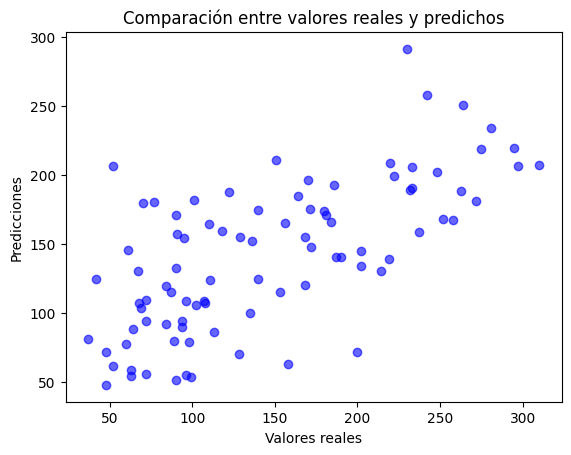

In [6]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre valores reales y predichos")
plt.show()
